# Chapter 16:  Amplitude Encoding
### Qiskit 1.0 (0.46)

Amplitude encoding encodes data into the amplitudes $\omega_i$ of a quantum state. 
\begin{equation}
|\psi \rangle = \sum_{i=1} ^N \omega_i \cdot   |x \rangle
\end{equation}
A complex normalized vector $\textbf{x}$ (length one), for example 

\begin{equation}
\textbf{x}=
\left( \begin{array}{c}
\sqrt{0.03} \\
\sqrt{0.07}\\
\sqrt{0.15}\\
\sqrt{0.05}\\
\sqrt{0.1}\\
\sqrt{0.3}\\
\sqrt{0.2}\\
\sqrt{0.1}\\
\end{array}
\right).
\end{equation}

with $qiskit$ little endian ordering $ |q_2q_1q_0 \rangle$

\begin{equation}
|\psi \rangle =\sqrt{0.03} \cdot  |000 \rangle + \sqrt{0.07}  \cdot |001 \rangle +  \sqrt{0.15} \cdot |010 \rangle + \sqrt{0.05}  \cdot |011 \rangle+
\end{equation}

\begin{equation}
+ \sqrt{0.1} \cdot |100 \rangle +  \sqrt{0.3} \cdot  |101 \rangle +    \sqrt{0.2} \cdot |110 \rangle +  \sqrt{0.1} \cdot  |111 \rangle
\end{equation}


## Top down divide Strategy

We build a top down binary tree that divides
the probability of observing $ |q_2 \rangle$ on the first level, to the probability of observing $ |q_2q_1 \rangle$ on the second level and finally the probability of observing $ |q_2q_1q_0 \rangle$ on the third level representing the required superposition $|\psi \rangle$. The binary tree is represented by multi control rotation gates  and requires $\log_2 n$ qubits to represent a vector of dimension $n$. 


### Level 1

The probability of observing  $q_2=0$ is $\sqrt{ 0.3 }$

We  use a  parameterized RY gate 
\begin{equation}
R_Y(\theta)= \left( \begin{array}{cc} 
 \cos\left( \frac{\theta}{2} \right) &  -\sin\left( \frac{\theta}{2} \right)  \\
 \sin\left( \frac{\theta}{2} \right)   &   \cos\left( \frac{\theta}{2} \right) \\
 \end{array} \right)
\end{equation}
to performs a rotation of one qubit along the $y$-axis by the rotation angle $\theta$ (in radiants)

\begin{equation}
\theta_0= 1.98231=2 \cdot \arccos( \sqrt{0.3} )
\end{equation}

from qiskit import QuantumCircuit,QuantumRegister, Aer,execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import RYGate
from math import pi

In [37]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution 
from qiskit.circuit.library import MCXGate
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import RYGate
from math import pi

In [38]:
qc = QuantumCircuit(1)

#ang = Sqrt[0.3]
#ArcCos[ang]*2
qc.ry(1.98231,0)

qc.draw()

┌────────────┐
q: ┤ Ry(1.9823) ├
   └────────────┘


Total count are: {'0': 0.300001453989211, '1': 0.699998546010789}


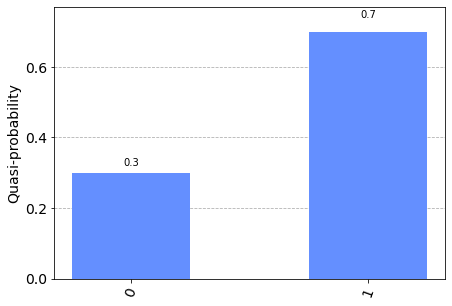

In [39]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

The measured result representing the qubit in superposition $\sqrt{0.3} \cdot  |0 \rangle + \sqrt{0.7} \cdot |1 \rangle$

### Level 2

The probability of observing  $q_2q_1=10$ is $\sqrt{ 0.4 }$;
\[
  \sqrt{0.1} \cdot |100 \rangle +  \sqrt{0.3} \cdot  |101 \rangle  
\]
and the probability of observing  $q_2q_1=11$  is $\sqrt{0.3}$ since both values divide the probability of  observing $q_2=1$  $\sqrt{0.7}$.
To define the angle $\theta_{10}$ we normalize the value $\sqrt{0.4}$  by division of the probability of observing $q_2=1$
\begin{equation}
\theta_{10}=1.42745=2 \cdot \arccos\left( \frac{\sqrt{0.4}}{\sqrt{0.7}} \right).
\end{equation}
The  rotation generates a superposition
\begin{equation}
RY_{\theta_{10}}  \sqrt{0.7} \cdot |1 \rangle=  \sqrt{0.4} \cdot |10 \rangle  + \sqrt{0.3} \cdot |11 \rangle.
\end{equation}
Applying both rotations by two control rotation gates controlled by the qubit $q_2$ generates a superposition (see Figure \ref{Num_Rept.eps})
\begin{equation}
 RY_{\theta_{00}} \sqrt{0.3} \cdot  |0 \rangle +RY_{\theta_{10}}  \sqrt{0.7} \cdot |1 \rangle= \sqrt{0.1} \cdot  |00 \rangle + \sqrt{0.2} \cdot |01 \rangle + \sqrt{0.4} \cdot |10 \rangle  + \sqrt{0.3} \cdot |11 \rangle.
\end{equation}
The circuit of level 1 and 2 decomposition is represented as (see Figure \ref{step_2.eps}). Since in the circuit only the two most important qubits (from the left) $ |q_2q_1q_0 \rangle$ are represented, their identification $q_1q_0$  corresponds to the qubits qubits $q_2q_1$ in the final circuit of three qubits.


In [40]:
qc = QuantumCircuit(2)


#ang = Sqrt[0.3]
#ArcCos[ang]*2
qc.ry(1.98231,1)
qc.barrier()

#ang = Sqrt[0.4]/Sqrt[0.7];
#ArcCos[ang]*2
qc.cry(1.42745,1,0)
#ang = Sqrt[0.1]/Sqrt[0.3];
#ArcCos[ang]*2
qc.x(1)
qc.cry(1.91063,1,0)
qc.x(1)


qc.draw()

░ ┌────────────┐     ┌────────────┐     
q_0: ───────────────░─┤ Ry(1.4275) ├─────┤ Ry(1.9106) ├─────
     ┌────────────┐ ░ └─────┬──────┘┌───┐└─────┬──────┘┌───┐
q_1: ┤ Ry(1.9823) ├─░───────■───────┤ X ├──────■───────┤ X ├
     └────────────┘ ░               └───┘              └───┘

Circuit representing the controlled rotation of one q  qubit $\sqrt{0.7} \cdot  |1 \rangle$  $\theta_{10}=1.42745$ and qubit $\sqrt{0.3} \cdot  |0 \rangle$  along the $y$-axis by the rotation angle $\theta_{00}=1.91063$. Since in the circuit only the two most important qubits (from the left) $ |q_2q_1q_0 \rangle$ are represented, their identification $q_1q_0$  corresponds to the qubits qubits $q_2q_1$ in the final circuit of three qubits. 


Total count are: {'00': 0.100000942340276, '01': 0.200000511648936, '10': 0.399998738870189, '11': 0.2999998071406}


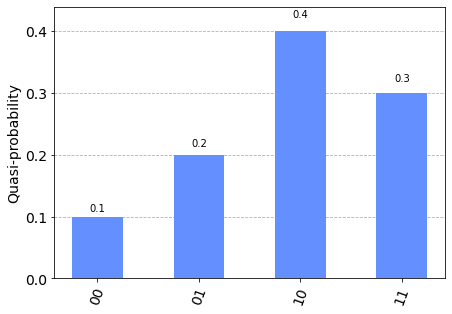

In [41]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

The measured result representing the qubit in superposition  $\sqrt{0.1} \cdot  |00 \rangle + \sqrt{0.2} \cdot |01 \rangle + \sqrt{0.4} \cdot |10 \rangle  + \sqrt{0.3} \cdot |11 \rangle$.

#### Level 3

Finally we estimated eight individual values $ |q_2q_1q_0 \rangle$ by four rotations on the level three.

The four multi control rotation gates are controlled by the qubits $q_2$ and $q_1$   resulting in the desired superposition $|\psi \rangle$, (see Figure \ref{step_3.eps})

\begin{equation}
|\psi \rangle =\sqrt{0.03} \cdot  |000 \rangle + \sqrt{0.07}  \cdot |001 \rangle +  \sqrt{0.15} \cdot |010 \rangle + \sqrt{0.05}  \cdot |011 \rangle+
\end{equation}

\begin{equation}
+ \sqrt{0.1} \cdot |100 \rangle +  \sqrt{0.3} \cdot  |101 \rangle +    \sqrt{0.2} \cdot |110 \rangle +  \sqrt{0.1} \cdot  |111 \rangle
\end{equation}


 The top down binary tree  divides
the probability of observing $ |q_2 \rangle$ on the first level, to the probability of observing $ |q_2q_1 \rangle$ on the second level and finally the probability of observing $ |q_2q_1q_0 \rangle$ on the third level representing by multi control rotation gates. 

In [42]:
qc = QuantumCircuit(3)

#1
#ang = Sqrt[0.3] a0
#ArcCos[ang]*2
qc.ry(1.98231,2)
qc.barrier()
#2
#ang = Sqrt[0.4]/Sqrt[0.7]; a2
#ArcCos[ang]*2
qc.cry(1.42745,2,1)
#ang = Sqrt[0.1]/Sqrt[0.3]; a1
#ArcCos[ang]*2
qc.x(2)
qc.cry(1.91063,2,1)
qc.x(2)
qc.barrier()
#3
#ang = Sqrt[0.2]/(Sqrt[0.3]); a6
#ArcCos[ang]*2
ccry = RYGate(1.23096).control(2)
qc.append(ccry,[2,1,0])
#ang = Sqrt[0.1]/(Sqrt[0.4]); a5
#ArcCos[ang]*2
#ccry = RYGate(2.0944).control(2,label=None)
ccry = RYGate(2.0944).control(2)
qc.x(1)
qc.append(ccry,[2,1,0])
qc.x(1)

qc.x(2)
#ang = Sqrt[0.15]/(Sqrt[0.2]); a4
#ArcCos[ang]*2
ccry = RYGate(1.0472).control(2)
qc.append(ccry,[2,1,0])
#ang = Sqrt[0.03]/(Sqrt[0.1]); a3
#ArcCos[ang]*2
ccry = RYGate(1.98231).control(2)
qc.x(1)
qc.append(ccry,[2,1,0])
qc.x(1)
qc.x(2)


qc.draw(fold=150)

░                                        ░ ┌───────────┐     ┌────────────┐     ┌────────────┐     ┌────────────┐     
q_0: ───────────────░────────────────────────────────────────░─┤ Ry(1.231) ├─────┤ Ry(2.0944) ├─────┤ Ry(1.0472) ├─────┤ Ry(1.9823) ├─────
                    ░ ┌────────────┐     ┌────────────┐      ░ └─────┬─────┘┌───┐└─────┬──────┘┌───┐└─────┬──────┘┌───┐└─────┬──────┘┌───┐
q_1: ───────────────░─┤ Ry(1.4275) ├─────┤ Ry(1.9106) ├──────░───────■──────┤ X ├──────■───────┤ X ├──────■───────┤ X ├──────■───────┤ X ├
     ┌────────────┐ ░ └─────┬──────┘┌───┐└─────┬──────┘┌───┐ ░       │      └───┘      │       ├───┤      │       └───┘      │       ├───┤
q_2: ┤ Ry(1.9823) ├─░───────■───────┤ X ├──────■───────┤ X ├─░───────■─────────────────■───────┤ X ├──────■──────────────────■───────┤ X ├
     └────────────┘ ░               └───┘              └───┘ ░                                 └───┘                                 └───┘

The top down binary tree  divides
the probability of observing $ |q_2 \rangle$ on the first level, to the probability of observing $ |q_2q_1 \rangle$ on the second level and finally the probability of observing $ |q_2q_1q_0 \rangle$ on the third level representing by multi control rotation gates.


Total count are: {'000': 0.030000428102374, '001': 0.070000514237902, '010': 0.150000171663414, '011': 0.050000339985522, '100': 0.099998836431039, '101': 0.29999990243915, '110': 0.199999789026653, '111': 0.100000018113946}


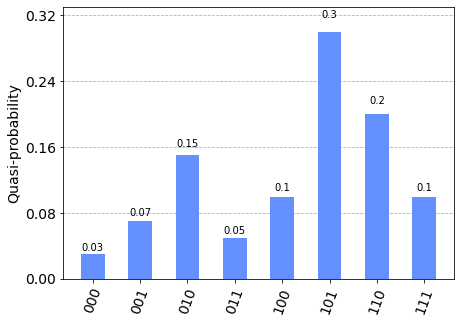

In [43]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

 The amplitudes of the superposition $|\psi \rangle$.

## Combining States

Instead of  representing the binary tree by multi control rotation gates we can use controlled SWAP operators with simple rotation gates. 


### Level 2

The binary tree at level two is represented by three qubits, to each qubit a rotation gate is applied. To the qubit $1$ we apply the rotation $\theta_0= 1.98231$, to the qubit $0$  we apply  the rotation $\theta_{10}=1.42745$ and to qubit $2$ we apply  the rotation $\theta_{00}=1.9106$. The value of the qubit  $1$ controls the swap operation and the measured tensor product of qubit $2$ with qubit $1$ represents the required distribution of the two qubits representing four states

In [44]:
qc = QuantumCircuit(3,2)

qc.ry(1.42745,0) #ok
qc.ry(1.91063,1) #ok
qc.ry(1.91063,2) #ok

qc.barrier()

qc.cswap(1,0,2)

#Measuring 0 1 
qc.measure(2,0)
qc.measure(1,1)

qc.draw()

┌────────────┐ ░          
q_0: ┤ Ry(1.4275) ├─░──X───────
     ├────────────┤ ░  │    ┌─┐
q_1: ┤ Ry(1.9106) ├─░──■────┤M├
     ├────────────┤ ░  │ ┌─┐└╥┘
q_2: ┤ Ry(1.9106) ├─░──X─┤M├─╫─
     └────────────┘ ░    └╥┘ ║ 
c: 2/═════════════════════╩══╩═
                          0  1

The binary tree at level two is represented by three qubits, to each qubit a rotation gate is applied. To the qubit $1$ we apply the rotation $\theta_0= 1.98231$, to the qubit $0$  we apply  the rotation $\theta_{10}=1.42745$ and to qubit $2$ we apply  the rotation $\theta_{00}=1.9106$. The value of the qubit  $1$ controls the swap operation and the measured tensor product of qubit $1$ with qubit $2$ represents the required distribution of the two qubits representing four states


Total count are: {'01': 2238, '00': 1071, '11': 2901, '10': 3790}


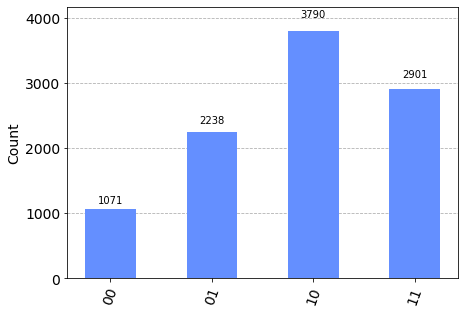

In [45]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc,shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

The required distribution of the two qubits representing four states.

### Level 3

The binary tree at level three is represented by seven qubits, to each qubit a rotation gate is applied. To the qubit $3$ we apply the rotation $\theta_0= 1.98231$, to the qubit $1$  we apply  the rotation $\theta_{10}=1.42745$ and to qubit $5$ we apply  the rotation $\theta_{00}=1.9106$.  The value of the qubit  $3$ controls the swap operation. For the level three we apply the additional four rotations, we apply the rotation  $\theta_{110}=1.23096$ to the qubit $0$, $\theta_{100}=2.0944$ to the qubit $2$, $\theta_{010}=1.0472$ to the qubit 4 and $\theta_{000}=1.98231$ to the qubit $6$. The qubit $1$ and $5$ representing the level $2$ control the rotation of the two sub-trees. The two sub-trees are merged with the results of level one by the controlled SWAP operation  controlled by the qubit $3$. The measured tensor product of qubit $3$ with qubit $5$ and $3$ represents the required distribution of the three qubits representing eight states

In [46]:
qc = QuantumCircuit(7,3)

qc.ry(1.23096,0)
qc.ry(1.42745,1)
qc.ry(2.0944,2)
qc.ry(1.91063,3)
qc.ry(1.0472,4)
qc.ry(1.91063,5)
qc.ry(1.98231,6)
qc.barrier()

qc.cswap(1,0,2)
qc.cswap(5,4,6)

qc.barrier()

qc.cswap(3,1,5)
qc.cswap(3,2,6)

#Measuring 0 1 3

qc.measure(6,0)
qc.measure(5,1)
qc.measure(3,2)

qc.draw()

┌───────────┐  ░     ░                
q_0: ┤ Ry(1.231) ├──░──X──░────────────────
     ├───────────┴┐ ░  │  ░                
q_1: ┤ Ry(1.4275) ├─░──■──░──X─────────────
     ├────────────┤ ░  │  ░  │             
q_2: ┤ Ry(2.0944) ├─░──X──░──┼──X──────────
     ├────────────┤ ░     ░  │  │       ┌─┐
q_3: ┤ Ry(1.9106) ├─░─────░──■──■───────┤M├
     ├────────────┤ ░     ░  │  │       └╥┘
q_4: ┤ Ry(1.0472) ├─░──X──░──┼──┼────────╫─
     ├────────────┤ ░  │  ░  │  │ ┌─┐    ║ 
q_5: ┤ Ry(1.9106) ├─░──■──░──X──┼─┤M├────╫─
     ├────────────┤ ░  │  ░     │ └╥┘┌─┐ ║ 
q_6: ┤ Ry(1.9823) ├─░──X──░─────X──╫─┤M├─╫─
     └────────────┘ ░     ░        ║ └╥┘ ║ 
c: 3/══════════════════════════════╩══╩══╩═
                                   1  0  2

The binary tree at level three is represented by seven qubits, to each qubit a rotation gate is applied. To the qubit $3$ we apply the rotation $\theta_0= 1.98231$, to the qubit $1$  we apply  the rotation $\theta_{10}=1.42745$ and to qubit $5$ we apply  the rotation $\theta_{00}=1.9106$.  The value of the qubit  $3$ controls the swap operation. For the level three we apply the additional four rotations, we apply the rotation  $\theta_{110}=1.23096$ to the qubit $0$, $\theta_{100}=2.0944$ to the qubit $2$, $\theta_{010}=1.0472$ to the qubit 4 and $\theta_{000}=1.98231$ to the qubit $6$. The qubit $1$ and $5$ representing the level $2$ control the rotation of the two sub-trees. The two sub-trees are merged with the results of level one by the controlled SWAP operation  controlled by the qubit $3$. The measured tensor product of qubit $3$ with qubit $5$ and $3$ represents the required distribution of the three qubits representing eight states.


Total count are: {'011': 553, '111': 927, '100': 916, '110': 1892, '001': 827, '000': 353, '010': 1697, '101': 2835}


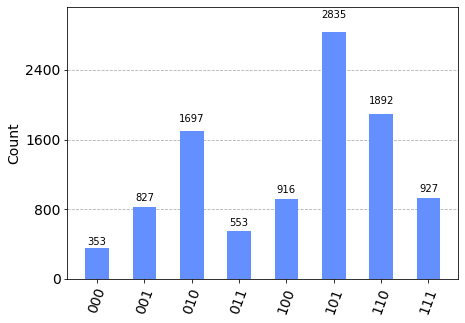

In [47]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc,shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

The required distribution of the three qubits representing eight states.

## Qiskit Amplitude Coding

Qiskit offers through the commands desired_state  and $initialize(desired$ $state, qubits)$ a possibility to initialize the desired states and through the $decompose$ command to indicate the resulting quantum circut

In [48]:
import math

In [49]:
desired_state = [
    math.sqrt(0.03),
    math.sqrt(0.07),
    math.sqrt(0.15),
    math.sqrt(0.05),
    math.sqrt(0.1),
    math.sqrt(0.3),
    math.sqrt(0.2),
    math.sqrt(0.1),
]
qc = QuantumCircuit(3)
qc.initialize(desired_state, [0,1,2])

qc.decompose().decompose().decompose().decompose().decompose().decompose().draw(fold=180)

┌────────────┐                              ┌───┐┌─────────────┐┌───┐┌─────────────┐┌───┐┌───────────────┐┌───┐
q_0: ─|0>───┤ Ry(1.5887) ├──────────────────────────────┤ X ├┤ Ry(0.44964) ├┤ X ├┤ Ry(0.01792) ├┤ X ├┤ Ry(-0.073961) ├┤ X ├
           ┌┴────────────┴┐ ┌───┐┌────────────────┐┌───┐└─┬─┘└─────────────┘└─┬─┘└─────────────┘└─┬─┘└───────────────┘└─┬─┘
q_1: ─|0>──┤ R(1.669,π/2) ├─┤ X ├┤ R(0.24159,π/2) ├┤ X ├──■───────────────────┼───────────────────■─────────────────────┼──
          ┌┴──────────────┴┐└─┬─┘└────────────────┘└─┬─┘                      │                                         │  
q_2: ─|0>─┤ U3(1.9823,0,0) ├──■──────────────────────■────────────────────────■─────────────────────────────────────────■──
          └────────────────┘


Total count are: {'000': 0.03, '001': 0.07, '010': 0.15, '011': 0.05, '100': 0.1, '101': 0.3, '110': 0.2, '111': 0.1}


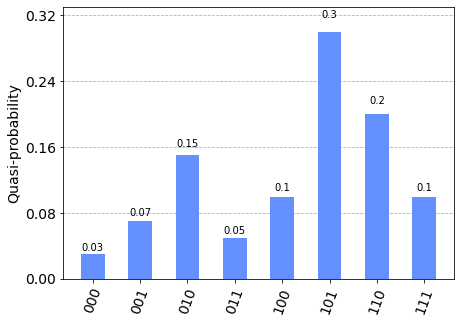

In [50]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose(all)).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

he quantum circuit generating the amplitudes of the superposition $|\psi \rangle$.

## Swap Test

We cannot access the amplitudes that represent vectors, but
we estimate $\langle x | y \rangle$ using the  swap test. Each state represents a normalized vector for the dimension $n$ represented by $m=\log_2 n$ qubits.
Note that the quantum  $| x \rangle$ and $| y \rangle$  are of length one in the $l_2$ norm.

The probability of measuring the control qubit in state  $|0 \rangle$ is given by
\begin{equation}
p(|0 \rangle)= \left| \frac{1}{2} \cdot \langle 0 |0 \rangle \cdot \left( | 0,x, y \rangle+| 1,y, x \rangle  \right) + \frac{1}{2} \cdot  \langle 0 |1 \rangle \cdot \left( | 0,x, y \rangle - | 1,y, x \rangle  \right) \right|^2
\end{equation}

\begin{equation}
p(|0 \rangle)= \frac{1}{4} \cdot  \left|  \left( | x \rangle | y \rangle+|y \rangle |x \rangle  \right) \right|^2
\end{equation}

\begin{equation}
p(|0 \rangle)= \frac{1}{4} \cdot  \left( \langle y  | y \rangle \langle x  | x \rangle  
+\langle y  | x \rangle \langle x  | y \rangle+\langle x  | y \rangle \langle y  | x \rangle
+\langle x  | x \rangle \langle y  | y \rangle  
  \right) 
\end{equation}

\begin{equation}
p(|0 \rangle)= \frac{1}{4} \cdot  \left( 1
+\langle y  | x \rangle \langle x  | y \rangle+\langle x  | y \rangle \langle y  | x \rangle
+ 1  
  \right) 
\end{equation}

\begin{equation}
p(|0 \rangle)= \frac{1}{2} +
  \frac{1}{4}  \cdot  \left( \langle y  | x \rangle \langle x  | y \rangle+\langle x  | y \rangle \langle y  | x \rangle
  \right) 
\end{equation}

\begin{equation}
p(|0 \rangle)= \frac{1}{2} +  \frac{1}{2} |  \langle x  | y \rangle |^2
\end{equation}
and
\begin{equation}
p(|1 \rangle)= \frac{1}{2} -  \frac{1}{2} |  \langle x  | y \rangle |^2
\end{equation}
with
\begin{equation}
 |  \langle x  | y \rangle | \approx \sqrt{  2 \cdot p(|0 \rangle) -1  }=\sqrt{1- 2 \cdot p(|1 \rangle)}.
\end{equation}
The probability $p(|0 \rangle)=0.5$ means that the states $| x \rangle$ and $| y \rangle$ are orthogonal, whereas the probability  $p(|0 \rangle)=1$ indicates that the states are identical.
We have to preform several measurements to estimate $p(|0 \rangle)$ or $p((|1 \rangle)$.

### Example for Two Dimensional Vectors

\begin{equation}
\textbf{x}=
\left( \begin{array}{c}
\sqrt{0.5} \\
\sqrt{0.5}\\
\end{array}
\right),~~~~
\textbf{y}=
\left( \begin{array}{c}
\sqrt{0.5} \\
-\sqrt{0.5}\\
\end{array}
\right).
\end{equation}

Qubit $0$ represents the vector $ \textbf{x}$ and qubit  $1$  the vector $ \textbf{y}$.  After $10000$ shots we measure $p(|0 \rangle) \approx 0.5010$ 
\begin{equation}
 |  \langle \textbf{x} | \textbf{y} \rangle | \approx \sqrt{  2 \cdot 0.501-1}=0.045.  
\end{equation}



In [51]:
qc = QuantumCircuit(3,1)

qc.h(2)
qc.barrier()
qc.h(0)
qc.x(1)
qc.h(1)

qc.barrier()
qc.cswap(2,0,1)
qc.h(2)

qc.measure(2,0)

qc.draw(fold=200)

░ ┌───┐      ░            
q_0: ──────░─┤ H ├──────░──X─────────
           ░ ├───┤┌───┐ ░  │         
q_1: ──────░─┤ X ├┤ H ├─░──X─────────
     ┌───┐ ░ └───┘└───┘ ░  │ ┌───┐┌─┐
q_2: ┤ H ├─░────────────░──■─┤ H ├┤M├
     └───┘ ░            ░    └───┘└╥┘
c: 1/══════════════════════════════╩═
                                   0


Total count are: {'1': 5009, '0': 4991}


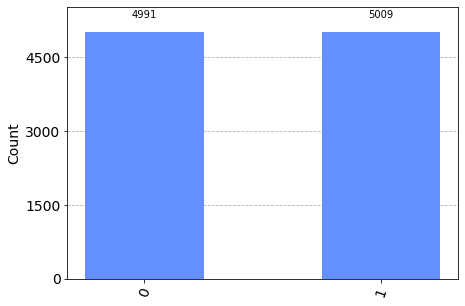

In [52]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc,shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

After $10000$ shots we measure $p(|0 \rangle)=0.5010$. Note that the results are probabilistic and that they might slightly differ from run to run.

### Example for Four Dimensional Vectors

\begin{equation}
\textbf{x}=
\left( \begin{array}{c}
\sqrt{0.1} \\
\sqrt{0.2}\\
\sqrt{0.4}\\
\sqrt{0.3}\\
\end{array}
\right),~~~~
\textbf{y}=
\left( \begin{array}{c}
0\\
0\\
\sqrt{0.5} \\
\sqrt{0.5}\\
\end{array}
\right).
\end{equation}
with
\begin{equation}
\langle \textbf{x} | \textbf{x} \rangle=\|| \textbf{x} \rangle\|_2=1,~~\langle \textbf{y}  | \textbf{y} \rangle=\|| \textbf{y} \rangle\|_2=1.
\end{equation}
and
\begin{equation}
\langle \textbf{x} | \textbf{y} \rangle=0.8345
\end{equation}



In [53]:
qc = QuantumCircuit(5,1)

qc.h(4)
qc.barrier()
#ang = Sqrt[0.3]
#ArcCos[ang]*2
qc.ry(1.98231,1)
qc.barrier()
#ang = Sqrt[0.4]/Sqrt[0.7];
#ArcCos[ang]*2
qc.cry(1.42745,1,0)
#ang = Sqrt[0.1]/Sqrt[0.3];
#ArcCos[ang]*2
qc.x(1)
qc.cry(1.91063,1,0)
qc.x(1)
qc.barrier()
qc.h(2)
qc.x(3)
qc.barrier()
qc.cswap(4,0,2)
qc.cswap(4,1,3)
qc.h(4)
qc.measure(4,0)

qc.draw(fold=200)

░                ░ ┌────────────┐     ┌────────────┐      ░       ░               
q_0: ──────░────────────────░─┤ Ry(1.4275) ├─────┤ Ry(1.9106) ├──────░───────░──X────────────
           ░ ┌────────────┐ ░ └─────┬──────┘┌───┐└─────┬──────┘┌───┐ ░       ░  │            
q_1: ──────░─┤ Ry(1.9823) ├─░───────■───────┤ X ├──────■───────┤ X ├─░───────░──┼──X─────────
           ░ └────────────┘ ░               └───┘              └───┘ ░ ┌───┐ ░  │  │         
q_2: ──────░────────────────░────────────────────────────────────────░─┤ H ├─░──X──┼─────────
           ░                ░                                        ░ ├───┤ ░  │  │         
q_3: ──────░────────────────░────────────────────────────────────────░─┤ X ├─░──┼──X─────────
     ┌───┐ ░                ░                                        ░ └───┘ ░  │  │ ┌───┐┌─┐
q_4: ┤ H ├─░────────────────░────────────────────────────────────────░───────░──■──■─┤ H ├┤M├
     └───┘ ░                ░                                        ░       ░       └───┘└╥┘
c: 1/══════════════════════════════════════════════════════════════════════════════════════╩═
                                                                                           0

Qubits $0$ and $1$ represents the vector $ \textbf{x}$, qubits  $2$ and $3$  the vector $ \textbf{y}$

In [54]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decomppose(),shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

AttributeError: 'QuantumCircuit' object has no attribute 'decomppose'

after $10000$ shots we measure $p(|0 \rangle) \approx 0.8479$
\begin{equation}
 |  \langle \textbf{x} | \textbf{y} \rangle | \approx \sqrt{  2 \cdot 0.8479-1}=0.8345. 
\end{equation}
